In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


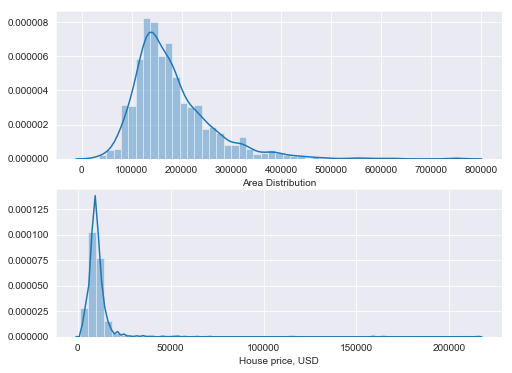

In [8]:
sns.set_style('darkgrid')

fig,(ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
sns.distplot(train_df['SalePrice'], ax=ax1)
sns.distplot(train_df['LotArea'], ax=ax2)
ax1.set_xlabel('Area Distribution')
ax2.set_xlabel('House price, USD')
plt.show()


In [9]:
len(train_df.query('LotArea >50000'))

11

In [10]:
len(train_df.query('SalePrice >500000'))

9

Preprocessing

We set a threshold of 80% null values and if any column has more than 80% null values we drop those columns

In [11]:
(train_df.isnull().sum()>(len(train_df)*0.80)).sum()

4

In [12]:
train_df.isna().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [13]:
test_df.isna().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
dtype: int64

In [14]:
train_df = train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [15]:
test_df = test_df.drop(['PoolQC', 'MiscFeature', 'Alley' ,'Fence'], axis =1)

In [16]:
temp = (train_df.isna().sum()).sort_values()
temp[temp>1]

MasVnrArea        8
MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
BsmtFinType2     38
BsmtExposure     38
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
GarageYrBlt      81
LotFrontage     259
FireplaceQu     690
dtype: int64

In [17]:
temp = (test_df.isna().sum()).sort_values()
temp[temp>1]

BsmtFullBath      2
Functional        2
Utilities         2
BsmtHalfBath      2
MSZoning          4
MasVnrArea       15
MasVnrType       16
BsmtFinType2     42
BsmtFinType1     42
BsmtExposure     44
BsmtQual         44
BsmtCond         45
GarageType       76
GarageFinish     78
GarageYrBlt      78
GarageQual       78
GarageCond       78
LotFrontage     227
FireplaceQu     730
dtype: int64

In [18]:
total_df = pd.concat([train_df]+ [test_df]).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
train_index = train_df['Id']
test_index = test_df['Id']
test_index

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [20]:
temp = total_df.isna().sum().sort_values()
temp[temp>1]

Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
dtype: int64

Filling all categorical empty valuess with None 

In [21]:
total_df['FireplaceQu'] = total_df['FireplaceQu'].fillna('None')
total_df['GarageQual'] = total_df['GarageQual'].fillna('None')
total_df['GarageFinish'] = total_df['GarageFinish'].fillna('None')
total_df['GarageCond'] = total_df['GarageCond'].fillna('None')
total_df['GarageType'] = total_df['GarageType'].fillna('None')
total_df['BsmtExposure'] = total_df['BsmtExposure'].fillna('None')
total_df['BsmtQual'] = total_df['BsmtQual'].fillna('None')
total_df['BsmtCond'] = total_df['BsmtCond'].fillna('None')
total_df['BsmtFinType2'] = total_df['BsmtFinType2'].fillna('None')
total_df['BsmtFinType1'] = total_df['BsmtFinType1'].fillna('None')
total_df['MasVnrType'] = total_df['MasVnrType'].fillna('None')
total_df['BsmtFinType2'] = total_df['BsmtFinType2'].fillna('None')

In [22]:
total_df.isna().sum().sort_values(ascending=False).head(20)


SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
BsmtFinSF1         1
KitchenQual        1
Exterior1st        1
BsmtFinSF2         1
Exterior2nd        1
SaleType           1
GarageArea         1
GarageCars         1
TotalBsmtSF        1
Electrical         1
BsmtUnfSF          1
dtype: int64

The columns that have numeric data and have missing values are

LotFrontage      
GarageYrBlt      
MasVnrArea

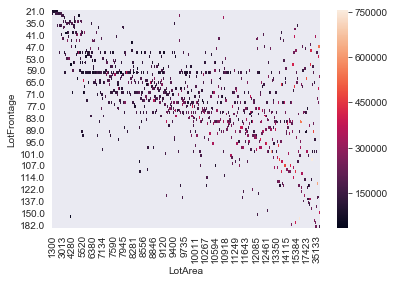

In [23]:
df = train_df.pivot_table(index='LotFrontage', columns='LotArea', values='SalePrice', aggfunc=np.mean)
sns.heatmap(df, annot=False, fmt=".1f")

             LotFrontage   LotArea
LotFrontage     1.000000  0.489896
LotArea         0.489896  1.000000


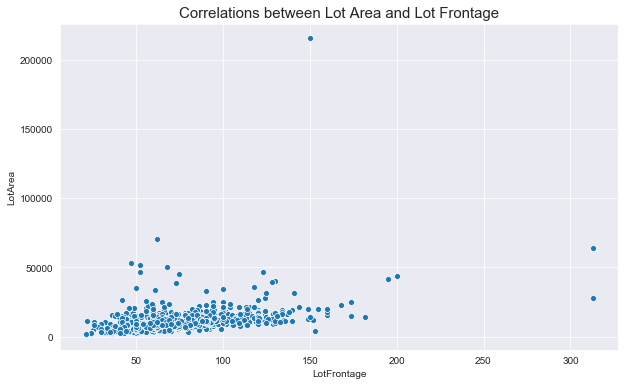

In [24]:
temp = total_df[['LotFrontage','LotArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['LotFrontage'], y=temp['LotArea'])
plt.title('Correlations between Lot Area and Lot Frontage', size=15);

print(temp.corr())

In [25]:
total_df['LotFrontage'] = total_df['LotFrontage'].fillna(np.sqrt(total_df['LotArea']))

             LotFrontage   LotArea
LotFrontage     1.000000  0.626687
LotArea         0.626687  1.000000


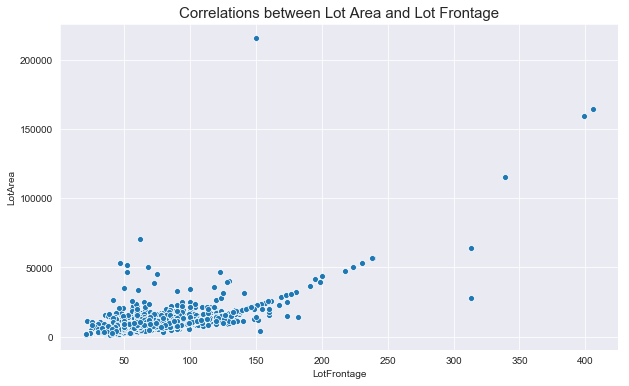

In [26]:
temp = total_df[['LotFrontage','LotArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['LotFrontage'], y=temp['LotArea'])
plt.title('Correlations between Lot Area and Lot Frontage', size=15);

print(temp.corr())

             GarageYrBlt  YearBuilt
GarageYrBlt     1.000000   0.834812
YearBuilt       0.834812   1.000000


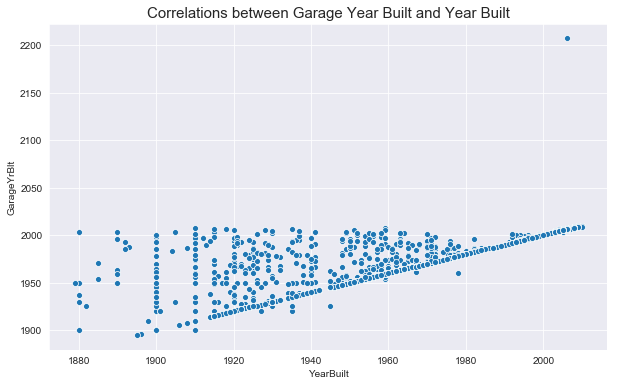

In [27]:
temp = total_df[['GarageYrBlt','YearBuilt']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['YearBuilt'], y=temp['GarageYrBlt'])
plt.title('Correlations between Garage Year Built and Year Built', size=15);

print(temp.corr())

In [28]:
total_df.query('GarageYrBlt>2100')['GarageYrBlt']
total_df.loc[total_df['GarageYrBlt'] == 2207,'GarageYrBlt'] = 2007

In [29]:
total_df['GarageYrBlt'] = total_df['GarageYrBlt'].fillna(total_df['YearBuilt'])

             GarageYrBlt  YearBuilt
GarageYrBlt     1.000000   0.860732
YearBuilt       0.860732   1.000000


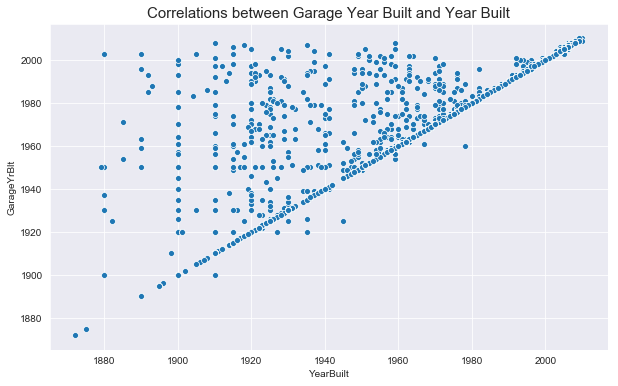

In [30]:
temp = total_df[['GarageYrBlt','YearBuilt']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['YearBuilt'], y=temp['GarageYrBlt'])
plt.title('Correlations between Garage Year Built and Year Built', size=15);

print(temp.corr())

In [31]:
total_df.isna().sum().sort_values(ascending=False).head(10)

SalePrice       1459
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
dtype: int64

In [32]:
total_df['GarageCars'].corr(total_df['GarageArea'])

0.8897004146858453

In [33]:
total_df['GarageArea'] = total_df.groupby('GarageType')['GarageArea'].transform(lambda x: x.fillna(value=x.median()))

In [34]:
total_df.loc[total_df['GarageCars'].isna()]['GarageArea']

2576    399.5
Name: GarageArea, dtype: float64

In [35]:
total_df.loc[total_df['GarageArea'] == 400]['GarageCars'].value_counts()

2.0    57
1.0     1
Name: GarageCars, dtype: int64

In [36]:
total_df['GarageCars'] = total_df['GarageCars'].fillna(2)

In [37]:
total_df.isna().sum().sort_values(ascending = False).head(15)

SalePrice       1459
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
Functional         2
Exterior2nd        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF1         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
Electrical         1
dtype: int64

In [38]:
total_df.loc[total_df['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None
1691,NaN,None
1706,NaN,None


In [39]:
total_df['MasVnrArea']= total_df['MasVnrArea'].fillna(0)

In [40]:
total_df.loc[total_df['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType


In [41]:
total_df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [42]:
total_df['MSZoning']= total_df['MSZoning'].fillna(value = 'RL')

In [43]:
total_df['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [44]:
total_df.isna().sum().sort_values(ascending = False).head(15)

SalePrice       1459
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
Electrical         1
Exterior2nd        1
BsmtUnfSF          1
KitchenQual        1
BsmtFinSF2         1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
ExterQual          0
dtype: int64

In [45]:
total_df.loc[total_df['Utilities'].isna()]['YearBuilt']

1915    1910
1945    1952
Name: YearBuilt, dtype: int64

In [46]:
total_df.loc[total_df['YearBuilt'] == 1910]['Utilities'].value_counts()

AllPub    42
Name: Utilities, dtype: int64

In [47]:
total_df.loc[total_df['YearBuilt'] == 1952]['Utilities'].value_counts()

AllPub    17
Name: Utilities, dtype: int64

In [48]:
total_df['Utilities'] = total_df['Utilities'].fillna(value = 'AllPub')

In [49]:
total_df['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [50]:
total_df.query('BsmtHalfBath=="nan" or BsmtFullBath=="nan"')[['BsmtHalfBath', 'BsmtFullBath', 'YearBuilt']]

,BsmtHalfBath,BsmtFullBath,YearBuilt
2120,NaN,NaN,1946
2188,NaN,NaN,1959


In [51]:
total_df[['BsmtHalfBath', 'BsmtFullBath']] = total_df[['BsmtHalfBath', 'BsmtFullBath']].fillna(value=0)

In [52]:
total_df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [53]:
total_df['Functional']=total_df['Functional'].fillna(value='Typ')

In [54]:
total_df.isna().sum().sort_values(ascending=False).head(10)

SalePrice      1459
BsmtFinSF1        1
KitchenQual       1
Exterior1st       1
Exterior2nd       1
BsmtUnfSF         1
BsmtFinSF2        1
SaleType          1
Electrical        1
TotalBsmtSF       1
dtype: int64

In [55]:
total_df['BsmtFinSF2'].value_counts().head(5)

0.0      2571
294.0       5
180.0       5
162.0       3
539.0       3
Name: BsmtFinSF2, dtype: int64

In [56]:
total_df['BsmtFinSF2'] = total_df['BsmtFinSF2'].fillna(0)

In [57]:
total_df['BsmtFinSF1'] = total_df['BsmtFinSF1'].fillna(0)

In [58]:
total_df['TotalBsmtSF'].corr(total_df['SalePrice'])

0.6135805515591954

In [59]:
total_df.isna().sum().sort_values(ascending=False).head(10)

SalePrice      1459
BsmtUnfSF         1
TotalBsmtSF       1
Exterior1st       1
Exterior2nd       1
KitchenQual       1
SaleType          1
Electrical        1
YrSold            0
Fireplaces        0
dtype: int64

In [60]:
total_df[['TotalBsmtSF','BsmtUnfSF']] = total_df[['TotalBsmtSF','BsmtUnfSF']].fillna(0)

In [61]:
total_df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [62]:
total_df['SaleType'] = total_df['SaleType'].fillna('WD')

In [63]:
total_df.loc[total_df['Exterior2nd'].isna()][['Exterior2nd','Exterior1st','YearBuilt']]

,Exterior2nd,Exterior1st,YearBuilt
2151,NaN,NaN,1940


In [64]:
total_df.loc[total_df['YearBuilt'] == 1940]['Exterior2nd'].value_counts()

MetalSd    12
Wd Sdng    10
VinylSd     9
Stucco      1
HdBoard     1
Wd Shng     1
Plywood     1
Name: Exterior2nd, dtype: int64

In [65]:
total_df.loc[total_df['YearBuilt'] == 1940]['Exterior1st'].value_counts()

Wd Sdng    13
MetalSd    11
VinylSd     9
WdShing     1
Stucco      1
Name: Exterior1st, dtype: int64

In [66]:
total_df[['Exterior1st','Exterior2nd']] = total_df[['Exterior1st','Exterior2nd']].fillna('MetalSd')

In [67]:
total_df.loc[total_df['Electrical'].isna()]['YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

In [68]:
total_df.loc[total_df['YearBuilt'] == 2006 ]['Electrical'].value_counts()

SBrkr    137
Name: Electrical, dtype: int64

In [69]:
total_df['Electrical'] = total_df['Electrical'].fillna(value='SBrkr')

In [70]:
total_df.loc[total_df['KitchenQual'].isna()]['YearBuilt']

1555    1917
Name: YearBuilt, dtype: int64

In [71]:
total_df.loc[total_df['YearBuilt']==1917][['KitchenQual', 'OverallCond']]

,KitchenQual,OverallCond
1248,TA,5
1555,NaN,3
1818,Ex,7


In [72]:
total_df.loc[total_df['OverallCond']==3]['KitchenQual'].value_counts()

TA    40
Fa     6
Gd     3
Name: KitchenQual, dtype: int64

In [73]:
total_df['KitchenQual'] = total_df['KitchenQual'].fillna(value='TA')

In [74]:
total_df.isna().sum().sort_values()

1stFlrSF            0
MasVnrType          0
MasVnrArea          0
MSZoning            0
MSSubClass          0
LowQualFinSF        0
LotShape            0
LotFrontage         0
LotConfig           0
LotArea             0
LandSlope           0
LandContour         0
KitchenQual         0
KitchenAbvGr        0
Id                  0
HouseStyle          0
MiscVal             0
HeatingQC           0
MoSold              0
OpenPorchSF         0
YearBuilt           0
WoodDeckSF          0
Utilities           0
TotalBsmtSF         0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleType            0
SaleCondition       0
RoofStyle           0
                 ... 
BsmtFinSF1          0
BsmtExposure        0
BsmtCond            0
BldgType            0
BedroomAbvGr        0
3SsnPorch           0
2ndFlrSF            0
Condition1          0
HalfBath            0
Condition2          0
EnclosedPorch       0
GarageYrBlt         0
GarageType          0
GarageQual          0
GarageFini

The Preprocessing is complete all missing values have been filled by the corresponding appropriate Median values 

In [75]:
total_df_ref_man = total_df[[
                           'Street',
                           'Exterior1st',
                           'KitchenQual',
                           'Heating',
    
                           'MSZoning',
                           'YearBuilt',
                           'Neighborhood',
                           'Condition1',
                           'BldgType',
                           'HouseStyle',
                           'OverallQual',
                           'OverallCond',
                           'ExterQual',
                           'ExterCond', 
                           'BsmtQual',
                           'BsmtCond',
                           'CentralAir',
                           'HeatingQC',
                           'Electrical',
                           '1stFlrSF',
                           '2ndFlrSF',
                           'GrLivArea',
                           'FullBath',
                           'BedroomAbvGr',
                           'KitchenAbvGr',
                           'Functional',
                           'GarageType',
                           'GarageQual',
                           'OpenPorchSF',
                           'PoolArea',
                           'SaleType',
                           'SaleCondition',
                           'SalePrice'
                          ]]

In [76]:
total_df_ref_man.index = total_df["Id"]

In [77]:
total_df_ref_man.head()

,Street,Exterior1st,KitchenQual,Heating,MSZoning,YearBuilt,Neighborhood,Condition1,BldgType,HouseStyle,...,BedroomAbvGr,KitchenAbvGr,Functional,GarageType,GarageQual,OpenPorchSF,PoolArea,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,Pave,VinylSd,Gd,GasA,RL,2003,CollgCr,Norm,1Fam,2Story,...,3,1,Typ,Attchd,TA,61,0,WD,Normal,208500.0
2,Pave,MetalSd,TA,GasA,RL,1976,Veenker,Feedr,1Fam,1Story,...,3,1,Typ,Attchd,TA,0,0,WD,Normal,181500.0
3,Pave,VinylSd,Gd,GasA,RL,2001,CollgCr,Norm,1Fam,2Story,...,3,1,Typ,Attchd,TA,42,0,WD,Normal,223500.0
4,Pave,Wd Sdng,Gd,GasA,RL,1915,Crawfor,Norm,1Fam,2Story,...,3,1,Typ,Detchd,TA,35,0,WD,Abnorml,140000.0
5,Pave,VinylSd,Gd,GasA,RL,2000,NoRidge,Norm,1Fam,2Story,...,4,1,Typ,Attchd,TA,84,0,WD,Normal,250000.0


In [78]:
total_df_ver2 = total_df[[
                            ### This features were added during the last attempt ###
                           'LotFrontage',
                           'LotArea',
                           'Condition2',
                           'YearRemodAdd',
                           'MasVnrArea',
                           'BsmtFinType1',
                           'TotalBsmtSF',
                           'TotRmsAbvGrd',
                           'Fireplaces',
                           'GarageYrBlt',
                           'GarageCars',
    
                            ### Current best result was performed with these features ### 
                           'Street',
                           'Exterior1st',
                           'KitchenQual',
                           'Heating',
                            
                            ### I also removed some features from the first list ###
                           'MSZoning',
                           'YearBuilt',
                           'Neighborhood',
                           'Condition1',
                           'BldgType',
                           'HouseStyle',
                           'OverallQual',
                           'OverallCond',
                           'ExterQual',
                           'ExterCond', 
                           'BsmtQual',
                           'BsmtCond',
                           'CentralAir',
                           'HeatingQC',
                           'Electrical',
                           '1stFlrSF',
                           '2ndFlrSF',
                           'GrLivArea',
                           #'FullBath',
                           #'BedroomAbvGr',
                           #'KitchenAbvGr',
                           'Functional',
                           'GarageType',
                           #'GarageQual',
                           #'OpenPorchSF',
                           #'PoolArea',
                           'SaleType',
                           'SaleCondition',
                           'SalePrice'
                          ]]

In [102]:
total_df_ver2.index = total_df['Id']

In [103]:
total_df_ver3 = total_df_ver2.copy()

In [104]:
def yearblt_bin(row):
    
    row = row['YearBuilt']
    
    if row <=1900 :
        return 'very old'
    if 1900 < row <= 1930:
        return 'old'
    if 1930 < row <= 1980:
        return 'moderate'
    else:
        return 'new'
    

total_df_ver3['YearBins'] = total_df_ver3.apply(yearblt_bin, axis=1)

In [105]:
def area_bin(row):
    
    row = row['GrLivArea']
    
    if row <= 800 :
        return 'small'
    if 800 < row <= 1700:
        return 'medium'
    if 1700 < row <= 2900:
        return 'large'
    else:
        return 'extra_large'
    

total_df_ver3['AreaBins'] =total_df_ver3.apply(area_bin, axis=1)

In [106]:
total_df_ver3['YearBins']

Id
1            new
2       moderate
3            new
4            old
5            new
6            new
7            new
8       moderate
9       moderate
10      moderate
11      moderate
12           new
13      moderate
14           new
15      moderate
16           old
17      moderate
18      moderate
19           new
20      moderate
21           new
22           old
23           new
24      moderate
25      moderate
26           new
27      moderate
28           new
29      moderate
30           old
          ...   
2890         old
2891    moderate
2892    moderate
2893    moderate
2894         old
2895         new
2896         new
2897    moderate
2898    moderate
2899         new
2900    moderate
2901    moderate
2902         new
2903         new
2904         new
2905    moderate
2906         new
2907    moderate
2908    moderate
2909    moderate
2910    moderate
2911    moderate
2912    moderate
2913    moderate
2914    moderate
2915    moderate
2916    moderate
2917    mod

In [107]:
total_df_ver3 = total_df_ver3.drop(['GrLivArea', 'YearBuilt'], axis=1)

In [108]:
total_df_pol = total_df_ver2.copy()
#full_df_pol = full_df_pol.drop(['Condition2','BsmtFinType1','SaleType'], axis=1)

total_df_pol['OverallQual*2'] = total_df_pol['OverallQual']*2

In [109]:
total_df_upd_0 = pd.get_dummies(total_df_ref_man, drop_first=True)
total_df_enc_2 = pd.get_dummies(total_df_ver2, drop_first=True)
total_df_pol_2 = pd.get_dummies(total_df_pol, drop_first=True)
total_df_upd_3 = pd.get_dummies(total_df_ver3, drop_first=True)

In [110]:
from sklearn.metrics import SCORERS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle, resample
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, IncrementalPCA

#regressors
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR




In [111]:
total_df_ver3.columns

Index(['LotFrontage', 'LotArea', 'Condition2', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinType1', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'Street', 'Exterior1st', 'KitchenQual',
       'Heating', 'MSZoning', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'CentralAir', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'Functional', 'GarageType', 'SaleType',
       'SaleCondition', 'SalePrice', 'YearBins', 'AreaBins'],
      dtype='object')

In [112]:
cat_features = ['LotFrontage', 'Condition2',
       'BsmtFinType1', 'Fireplaces', 'SaleType', 'SaleCondition', 'Street',
       'Exterior1st', 'KitchenQual', 'Heating', 'MSZoning', 
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'CentralAir', 'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'SaleCondition']

cat_features_3 = ['LotFrontage', 'Condition2',
       'BsmtFinType1', 'Fireplaces', 'SaleType', 'SaleCondition', 'Street',
       'Exterior1st', 'KitchenQual', 'Heating', 'MSZoning', 
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'CentralAir', 'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'SaleCondition', 'YearBins',
       'AreaBins']

In [113]:
enc = OrdinalEncoder()

In [115]:
total_df_ver2_cat = total_df_ver2.copy()
total_df_ver2_cat[cat_features] = enc.fit_transform(total_df_ver2_cat[cat_features]).astype('int')

total_df_ver3_cat = total_df_ver3.copy()
total_df_ver3_cat[cat_features_3] = enc.fit_transform(total_df_ver3_cat[cat_features_3]).astype('int')

In [116]:
RND_ST = 42

In [120]:
X_train_2 = total_df_enc_2.query('index in @train_index').drop(['SalePrice'], axis=1).reset_index(drop=True)
X_test_2 = total_df_enc_2.query('index in @test_index').drop(['SalePrice'], axis=1).reset_index(drop=True)

X_train_cat = total_df_ver2_cat.query('index in @train_index').drop(['SalePrice'], axis=1).reset_index(drop=True).astype('int')
X_test_cat = total_df_ver2_cat.query('index in @test_index').drop(['SalePrice'], axis=1).reset_index(drop=True).astype('int')

X_train_3 = total_df_upd_3.query('index in @train_index').drop(['SalePrice'], axis=1).reset_index(drop=True).astype('int')
X_test_3 = total_df_upd_3.query('index in @test_index').drop(['SalePrice'], axis=1).reset_index(drop=True).astype('int')

X_train_3_cat = total_df_ver3_cat.query('index in @train_index').drop(['SalePrice'], axis=1).reset_index(drop=True).astype('int')
X_test_3_cat = total_df_ver3_cat.query('index in @test_index').drop(['SalePrice'], axis=1).reset_index(drop=True).astype('int')

y_train = total_df_upd_0.query('index in @train_index')['SalePrice'].reset_index(drop=True)


### Validation subsets

#X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=RND_ST) 

X_train_sub_2, X_valid_sub_2, y_train_sub_2, y_valid_sub_2 = train_test_split(X_train_2, y_train, test_size=0.2, random_state=RND_ST) 
X_train_sub_c, X_valid_sub_c, y_train_sub_c, y_valid_sub_c = train_test_split(X_train_cat, y_train, test_size=0.2, random_state=RND_ST) 

X_train_sub_3, X_valid_sub_3, y_train_sub_3, y_valid_sub_3 = train_test_split(X_train_3, y_train, test_size=0.2, random_state=RND_ST) 
#X_train_sub_3c, X_valid_sub_3c, y_train_sub_3c, y_valid_sub_3c = train_test_split(X_train_3_cat, y_train, test_size=0.2, random_state=RND_ST) 

In [121]:
def mae(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
    print('MAE test = ', mean_absolute_error(y_test, y_test_pred))